In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
vaccine_data = pd.read_csv('country_vaccinations.csv')

In [5]:
print(vaccine_data.columns)

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')


In [6]:
vaccine_data.sample(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
5956,Honduras,HND,2021-03-12,NaN,NaN,NaN,NaN,276.0,NaN,NaN,NaN,28.0,"Moderna, Oxford/AstraZeneca",Government of Honduras,https://proceso.hn/honduras-a-la-zaga-en-vacun...
12500,Scotland,OWID_SCT,2021-03-04,1825869.0,1717672.0,108197.0,37203.0,31086.0,33.42,31.44,1.98,5690.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
10410,Northern Ireland,OWID_NIR,2021-02-05,316420.0,289889.0,26531.0,15141.0,12601.0,16.71,15.31,1.40,6654.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4713,Finland,FIN,2021-01-27,126910.0,117555.0,9355.0,9903.0,9264.0,2.29,2.12,0.17,1672.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Finnish Institute for Health and Welfare,https://sampo.thl.fi/pivot/prod/en/vaccreg/cov...
14328,Tunisia,TUN,2021-03-29,53089.0,53089.0,NaN,NaN,5010.0,0.45,0.45,NaN,424.0,"Pfizer/BioNTech, Sinovac, Sputnik V",Ministry of Health,https://www.facebook.com/santetunisie.rns.tn/p...
11497,Qatar,QAT,2021-01-02,NaN,NaN,NaN,NaN,1351.0,NaN,NaN,NaN,469.0,Pfizer/BioNTech,Ministry of Public Health,https://covid19.moph.gov.qa/EN/Pages/Vaccinati...
10848,Palestine,PSE,2021-04-03,100386.0,90204.0,10182.0,NaN,4611.0,1.97,1.77,0.20,904.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.facebook.com/mohps/posts/375093807...
7713,Kuwait,KWT,2021-02-03,NaN,NaN,NaN,NaN,7000.0,NaN,NaN,NaN,1639.0,Pfizer/BioNTech,Ministry of Health,https://twitter.com/alqabas/status/13896147564...
15206,Venezuela,VEN,2021-03-24,NaN,NaN,NaN,NaN,92.0,NaN,NaN,NaN,3.0,Sputnik V,Government of Venezuela,https://www.swissinfo.ch/spa/coronavirus-venez...
12912,Sierra Leone,SLE,2021-05-01,61107.0,55083.0,6024.0,NaN,721.0,0.77,0.69,0.08,90.0,Oxford/AstraZeneca,Ministry of Health and Sanitation,https://www.facebook.com/mohsict/photos/pcb.13...


In [7]:
iso_codes = set(vaccine_data['iso_code'])
print(iso_codes)

{'BMU', 'NAM', 'JPN', 'GUY', 'KAZ', 'GIB', 'COL', 'SLE', 'VNM', 'KGZ', 'SWZ', 'SDN', 'ZAF', 'PRT', 'TGO', 'DMA', 'CHL', 'POL', 'SSD', 'MSR', 'ARM', 'AUS', 'PAN', 'UZB', 'DNK', 'NER', 'MLI', 'AGO', 'GHA', 'IMN', 'SLV', 'EGY', 'AFG', 'PHL', 'KWT', 'SEN', 'OWID_WLS', 'IRN', 'CZE', 'LSO', 'VEN', 'IRQ', 'GRC', 'HUN', 'SVN', 'RWA', 'DEU', 'BLZ', 'MLT', 'CAN', 'LIE', 'ABW', 'ESP', 'FRO', 'MRT', 'CHE', 'ROU', 'GIN', 'EST', 'USA', 'NGA', 'CUW', 'OWID_ENG', 'OWID_NIR', 'IND', 'TUN', 'OWID_SCT', 'BOL', 'JOR', 'DZA', 'LKA', 'ZWE', 'PSE', 'ZMB', 'LAO', 'BEL', 'ECU', 'CPV', 'MEX', 'AUT', 'JAM', 'PRY', 'BLR', 'MNE', 'GRL', 'MDA', 'TUR', 'BRB', 'MAR', 'GEO', 'UGA', 'CYP', 'ITA', 'MWI', 'BRN', 'NLD', 'FIN', 'BRA', 'COG', 'ISL', 'ETH', 'ARG', 'OWID_CYN', 'ALB', 'SLB', 'SVK', 'COD', 'SOM', 'GBR', 'TCA', 'CMR', 'BGR', 'FJI', 'SMR', 'LBN', 'CYM', 'KNA', 'BHS', 'HKG', 'BIH', 'NRU', 'RUS', 'MMR', 'PNG', 'SYR', 'MNG', 'GAB', 'SUR', 'LBY', 'HND', 'SHN', 'OMN', 'DJI', 'QAT', 'SRB', 'PAK', 'HRV', 'KOR', 'PER', '

In [8]:
def get_country_data(vaccine_data, country_iso_code, start_date='2021-01-15', end_date='2021-05-01'):
    country_data = vaccine_data[vaccine_data['iso_code'] == country_iso_code].fillna(method='ffill')
    return country_data[(country_data['date'] >= start_date) & (country_data['date'] <= end_date)]

In [9]:
def add_country_plot(country_iso_code, feature, xlabel, ylabel):
    current_country = get_country_data(vaccine_data, country_iso_code)
    # Now we sort the data by date
    current_country.sort_values('date')
    plt.plot(current_country['date'],
             current_country[feature],
             linestyle = 'dotted', label = country_iso_code)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks([0, 30, 60, 90, 120], ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
    plt.legend()

In [10]:
def get_line_plot(countries_iso, feature, xlabel, ylabel):
    plt.clf()
    for iso in countries_iso:
        add_country_plot(iso, feature, xlabel, ylabel)
    plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


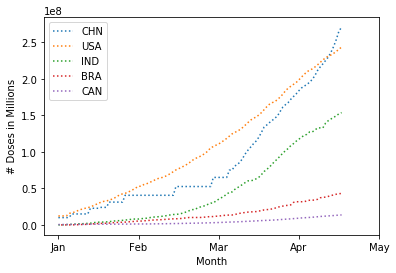

In [11]:
get_line_plot(["CHN", "USA","IND","BRA", "CAN"], 
         feature="total_vaccinations", 
         xlabel = "Month", 
         ylabel="# Doses in Millions")

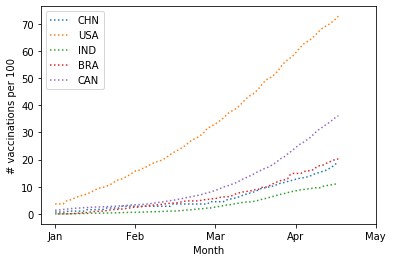

In [12]:
get_line_plot(["CHN", "USA","IND","BRA","CAN"], 
         feature="total_vaccinations_per_hundred", 
         xlabel = "Month", 
         ylabel="# vaccinations per 100")

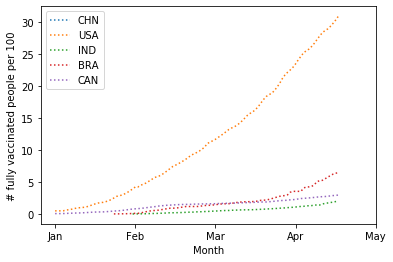

In [13]:
get_line_plot(["CHN", "USA","IND","BRA","CAN"], 
         feature="people_fully_vaccinated_per_hundred", 
         xlabel = "Month", 
         ylabel="# fully vaccinated people per 100")

In [14]:
def get_aggregated_country_stats(features, replace_missing_values_with=-1):
    country_stats = {}
    for iso_code in iso_codes:
        country_stats[iso_code] = {}
        for feature in features:
            country_data = get_country_data(vaccine_data, iso_code)
            country_stats[iso_code][feature] = max(country_data[feature].fillna(replace_missing_values_with))
    
    return pd.DataFrame.from_dict(country_stats).T

def get_top_k_countries (df, feature, k=10):
    top_k = df.sort_values(feature, ascending=False).head(k)
    top_k = top_k[[feature,'country', 'iso_code']] 
    top_k['iso_code'] = top_k['iso_code'].str.replace('OWID_', '')
    return top_k

In [31]:
aggregation_columns = [
    'total_vaccinations','people_vaccinated', 'people_fully_vaccinated',
    'daily_vaccinations','total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
    'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million', 'country', 'iso_code',
'daily_vaccinations_per_million']

In [32]:
aggregated_country_stats = get_aggregated_country_stats(aggregation_columns)

In [26]:
top_countries_by_abs = get_top_k_countries(aggregated_country_stats, "total_vaccinations", k=10)

In [27]:
top_countries_by_per_100 = get_top_k_countries(aggregated_country_stats[aggregated_country_stats['total_vaccinations'] > 1000000], "total_vaccinations_per_hundred", k=10)

In [53]:
def get_bar_plot(y, x, xlabel, ylabel):
    y_pos = np.arange(len(x))
    # Create bars
    plt.bar(y_pos, y)

    # Create names on the x-axis
    plt.xticks(y_pos, x, size=11)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Show graphic
    plt.show()
    
def get_horz_bar_plot(y, x, xlabel, ylabel):
    y_pos = np.arange(len(y))
    # Create bars
    plt.barh(y_pos, x)

    # Create names on the x-axis
    plt.yticks(y_pos, y, size=11)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Show graphic
    plt.show()
    
def get_pie_plot(y, x, xlabel):
    # Create bars
    plt.pie(y, labels = x)
    plt.xlabel(xlabel)
    plt.show()

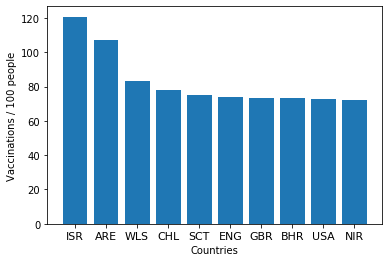

In [29]:
get_bar_plot(top_countries_by_per_100['total_vaccinations_per_hundred'], top_countries_by_per_100['iso_code'], xlabel = 'Countries', ylabel='Vaccinations / 100 people')

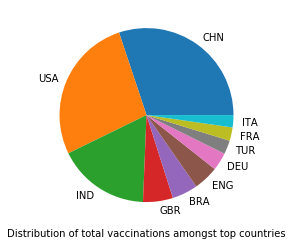

In [30]:
top_countries_by_abs['total_vaccinations_normalized'] = top_countries_by_abs['total_vaccinations'] / sum (top_countries_by_abs['total_vaccinations'])
get_pie_plot(top_countries_by_abs['total_vaccinations_normalized'], top_countries_by_abs['iso_code'], xlabel = "Distribution of total vaccinations amongst top countries")

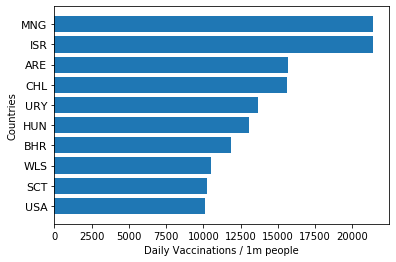

In [55]:
top_countries_by_daily_vaccinations = get_top_k_countries(aggregated_country_stats[aggregated_country_stats['total_vaccinations'] > 1000000],
                                                          "daily_vaccinations_per_million",
                                                           k=10)
top_countries_by_daily_vaccinations = top_countries_by_daily_vaccinations[::-1]
get_horz_bar_plot(top_countries_by_daily_vaccinations['iso_code'], top_countries_by_daily_vaccinations['daily_vaccinations_per_million'], ylabel = 'Countries', xlabel='Daily Vaccinations / 1m people')

In [42]:
top_countries_by_daily_vaccinations['iso_code']

MNG         MNG
ISR         ISR
ARE         ARE
CHL         CHL
URY         URY
HUN         HUN
BHR         BHR
OWID_WLS    WLS
OWID_SCT    SCT
USA         USA
Name: iso_code, dtype: object

In [22]:
def get_plots_for_country (countries):
    get_line_plot(countries, 
         feature="total_vaccinations", 
         xlabel = "Month", 
         ylabel="# total_vaccinations")
    
    get_line_plot(countries, 
         feature="total_vaccinations_per_hundred", 
         xlabel = "Month", 
         ylabel="total_vaccinations_per_hundred")

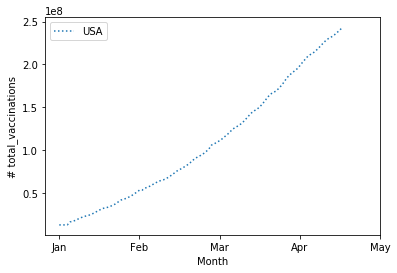

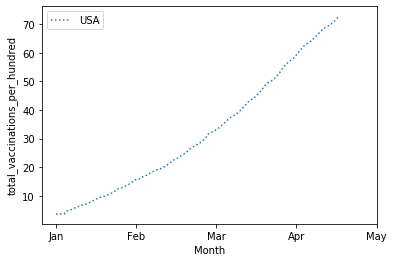

In [34]:
get_plots_for_country(["USA"])

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


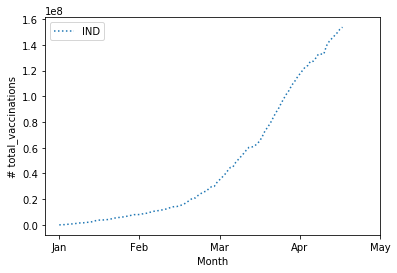

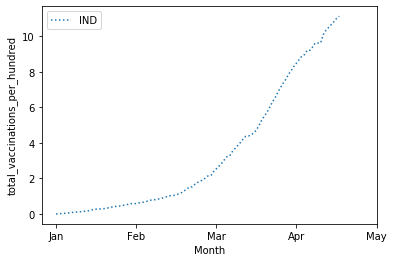

In [56]:
get_plots_for_country(["IND"])

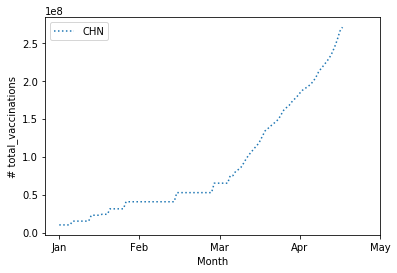

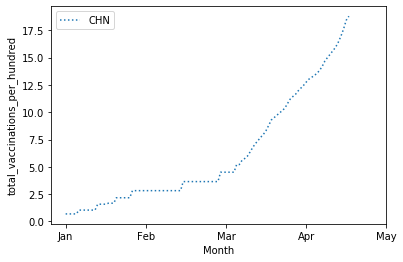

In [35]:
get_plots_for_country(["CHN"])

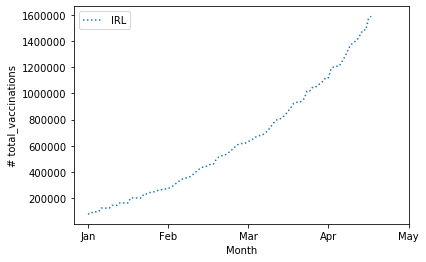

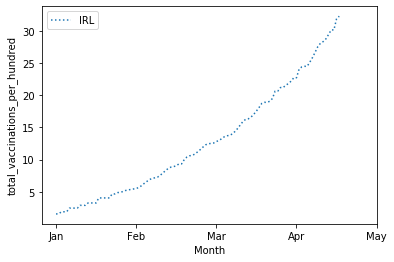

In [64]:
get_plots_for_country(["IRL"])

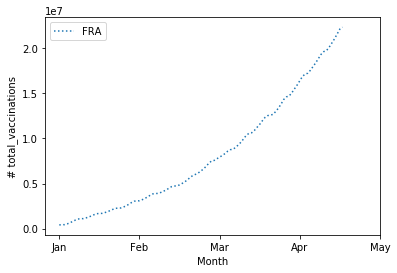

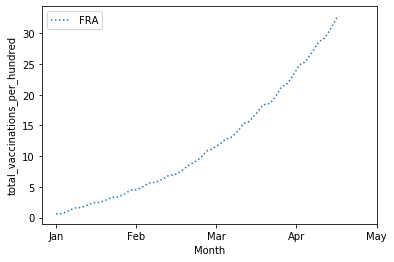

In [65]:
get_plots_for_country(["FRA"])

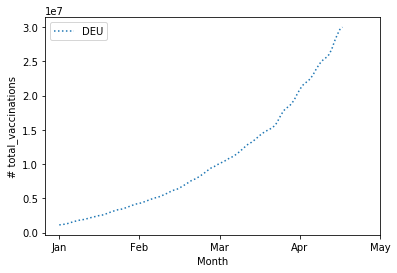

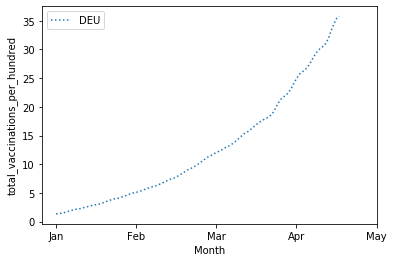

In [67]:
get_plots_for_country(["DEU"])

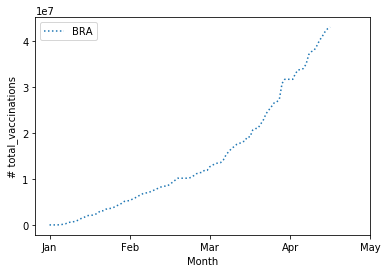

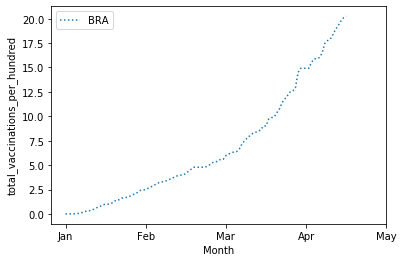

In [75]:
get_plots_for_country(["BRA"])

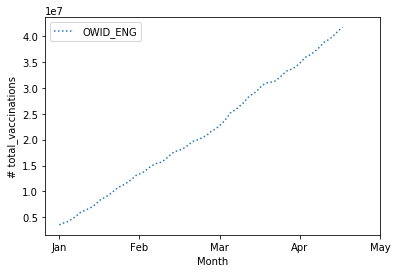

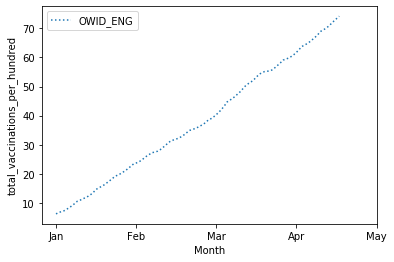

In [70]:
get_plots_for_country(["OWID_ENG"])

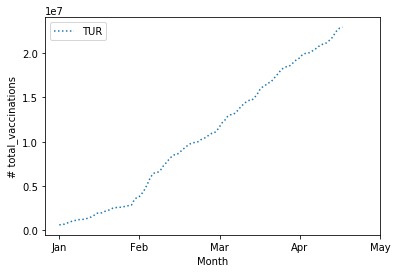

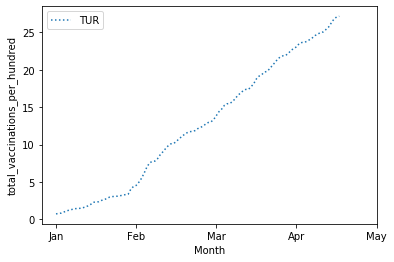

In [71]:
get_plots_for_country(["TUR"])

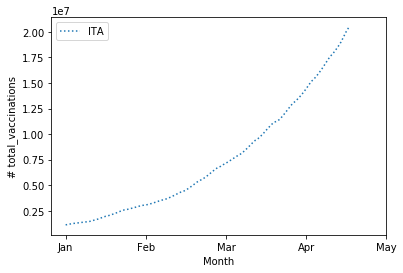

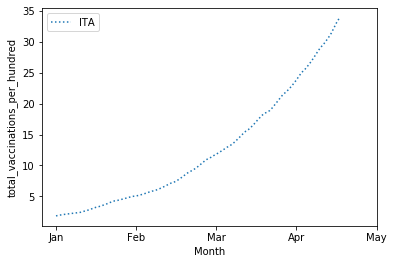

In [72]:
get_plots_for_country(["ITA"])

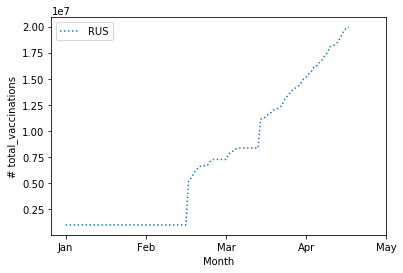

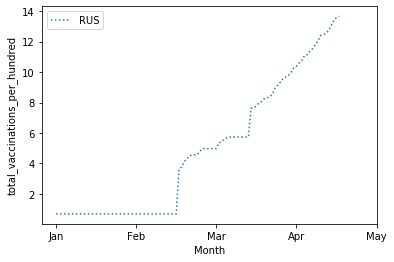

In [73]:
get_plots_for_country(["RUS"])

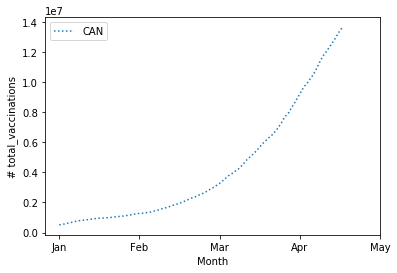

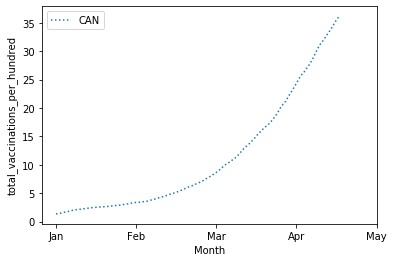

In [74]:
get_plots_for_country(["CAN"])